**Libraries**

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import time

**Volcano plot**


-----------------------------------------------------------------------

                 p_values  fold_change
Cell type                             
3.8-1.2      7.575100e-01    -0.386410
3.8-1.3      8.503194e-03    -3.013131
3.8-1.4      4.539029e-01    -0.943119
3.8-1.5      1.150533e-01    -4.136450
5-HT3C2      1.231468e-03    -1.270829
...                   ...          ...
ZYX          0.000000e+00     1.299750
ZZEF1        1.045636e-09    -0.179578
ZZZ3         9.950252e-21    -0.227067
bA255A11.4   1.424001e-01     1.289003
bA395L14.12  2.075226e-01    -0.271316

[48702 rows x 2 columns]

-----------------------------------------------------------------------

Genes up-regulated 

                 p_values  fold_change
Cell type                             
AADAC        2.366298e-04     3.535846
ABCC12       0.000000e+00     4.599905
ABCC3        2.326974e-84     2.135799
ABHD17AP6    4.362237e-58     2.612064
ABO         2.519200e-131     2.919553
...                   ...

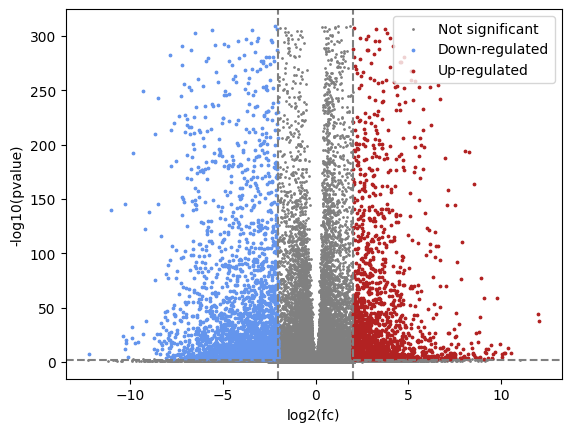


-----------------------------------------------------------------------

                  p_values  fold_change
Cell type                              
3.8-1.2       4.003867e-01     1.066965
3.8-1.3       9.848690e-01    -0.016156
3.8-1.4       2.662282e-01     1.634398
3.8-1.5       7.238870e-01    -0.485576
5-HT3C2       3.578023e-01     0.311411
...                    ...          ...
ZYX          7.541807e-150    -0.816472
ZZEF1         2.566623e-04     0.102851
ZZZ3          3.584937e-08    -0.123520
bA255A11.4    3.639493e-01    -0.979205
bA395L14.12   7.968127e-02     0.337267

[48702 rows x 2 columns]

-----------------------------------------------------------------------

Genes up-regulated 

                  p_values  fold_change
Cell type                              
ABCA9-AS1     2.176663e-06     3.001239
ABCB5         1.423154e-57     3.706010
ABI3BP        9.421227e-51     2.374627
ACADL        5.670771e-190     3.542551
ACAN          1.484262e-36     2.420883
...  

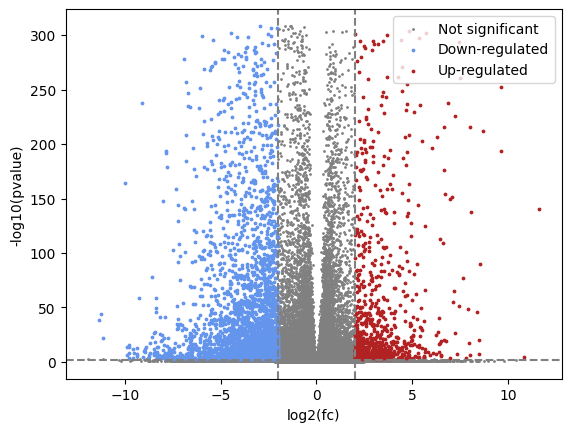


-----------------------------------------------------------------------

                  p_values  fold_change
Cell type                              
3.8-1.2       4.929293e-02    -4.749263
3.8-1.3       2.974140e-02     3.561008
3.8-1.4       1.145004e-02    -5.514622
3.8-1.5       1.915192e-01     4.501035
5-HT3C2       2.027073e-02     1.752493
...                    ...          ...
ZYX          7.420138e-257    -2.374196
ZZEF1         9.159464e-04     0.228702
ZZZ3          9.480177e-37     0.683977
bA255A11.4    4.990089e-02    -1.569786
bA395L14.12   9.592517e-01    -0.030355

[48702 rows x 2 columns]

-----------------------------------------------------------------------

Genes up-regulated 

                p_values  fold_change
Cell type                            
A2M         3.794594e-89     2.948112
A4GALT      1.601000e-05     2.257137
AASS       9.801742e-217     4.795170
ABCA2      6.582238e-187     3.126194
ABCA8      2.660390e-152     7.977080
...                

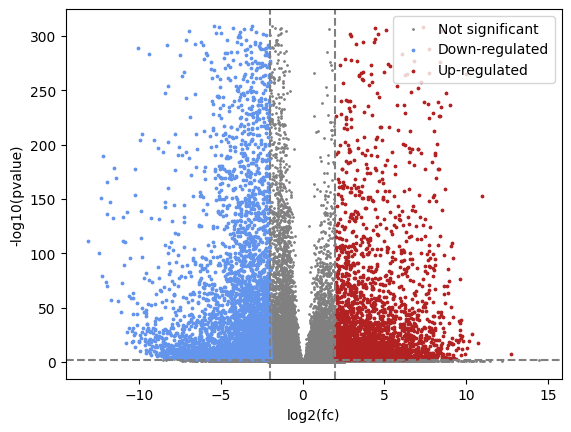

Finished


In [9]:
# Paths

paths_files="/content/drive/MyDrive/Cell_Proportion/Parameters/"

 # Name of each file

file_name=[
    "Exc",
    "Inh",
    "Non-neuronal"
]



for phenotype in file_name:

    gene_expr=pd.read_csv(paths_files+phenotype+"_pvalue_foldchange.csv", index_col=0)
    #gene_expr=gene_expr[["p_values","fold_change"]]
    print("\n-----------------------------------------------------------------------\n")
    print(gene_expr)



    plt.scatter(x=gene_expr['fold_change'],y=gene_expr['p_values'].apply(lambda x:-np.log10(x)),s=1,label="Not significant",color="grey")

    # highlight down- or up- regulated genes
    down = gene_expr[(gene_expr['fold_change']<=-2)&(gene_expr['p_values']<=0.001)] #Only genes with p_value less than or equal to 0.001 will be plotted for down genes.
    up = gene_expr[(gene_expr['fold_change']>=2)&(gene_expr['p_values']<=0.001)] #Only genes with p_value less than or equal to 0.001 will be plotted for up genes.

    #Plot the data
    plt.scatter(x=down['fold_change'],y=down['p_values'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="cornflowerblue")
    plt.scatter(x=up['fold_change'],y=up['p_values'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="firebrick")

    plt.xlabel("log2(fc)")
    plt.ylabel("-log10(pvalue)")
    plt.axvline(-2,color="grey",linestyle="--")
    plt.axvline(2,color="grey",linestyle="--")
    plt.axhline(2,color="grey",linestyle="--")
    plt.legend()

    print("\n-----------------------------------------------------------------------\n")
    print("Genes up-regulated \n")
    print(up)
    # Save the up regulated genes
    #up.to_csv(paths_files+phenotype+"_up.csv")

    print("\n-----------------------------------------------------------------------\n")
    print("Genes down-regulated \n")
    print(down)
    #Save the down regulared genes
    #down.to_csv(paths_files+phenotype+"_down.csv")

    # Save the volcano plot figure
    #plt.savefig(paths_files+phenotype+"_volcano_plot.svg")
    print("\n-----------------------------------------------------------------------\n")
    print("Volcano Plot for: "+phenotype)
    print("\n-----------------------------------------------------------------------\n")
    plt.show()

print("Finished")
